# Summarizing Data

### 1. Setup environment

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Get data

In [2]:
stocks = "AMZN GOOG NFLX FB GLD".split()
stocks

['AMZN', 'GOOG', 'NFLX', 'FB', 'GLD']

In [4]:
data = pdr.get_data_yahoo(stocks, '20181001')['Close']

In [5]:
data.head()

Symbols,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,
2018-10-01,2004.359985,162.440002,112.570000,1195.310059,381.429993
2018-10-02,1971.310059,159.330002,113.870003,1200.109985,377.140015
2018-10-03,1952.760010,162.429993,113.419998,1202.949951,377.049988
2018-10-04,1909.420044,158.850006,113.480003,1168.189941,363.649994
2018-10-05,1889.650024,157.330002,113.800003,1157.349976,351.350006


### 3. Basic descriptive statistics 

In [7]:
data.quantile(.25)

Symbols
AMZN    1659.115051
FB       151.769997
GLD      120.370003
GOOG    1080.940002
NFLX     293.500000
Name: 0.25, dtype: float64

In [8]:
data.describe()

Symbols,AMZN,FB,GLD,GOOG,NFLX
count,263.000000,263.000000,263.000000,263.000000,263.000000
mean,1761.011257,169.866768,126.269772,1136.252319,327.236653
std,132.402813,20.044542,9.372458,66.558996,38.110467
min,1343.959961,124.059998,112.540001,976.219971,233.880005
25%,1659.115051,151.769997,120.370003,1080.940002,293.500000
50%,1772.359985,174.199997,122.980003,1138.069946,338.049988
75%,1858.244995,186.195000,133.635002,1192.924988,359.820007
max,2020.989990,204.869995,146.660004,1287.579956,385.029999


### 4. Typical visualizations

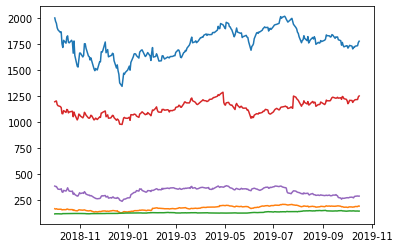

In [9]:
plt.plot(data)

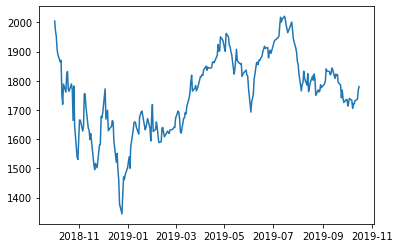

In [12]:
fig = plt.plot(data['AMZN'])

In [13]:
pct_change = np.log(data).diff()
pct_change.head()

Symbols,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,
2018-10-01,NaN,NaN,NaN,NaN,NaN
2018-10-02,-0.016626,-0.019331,0.011482,0.004008,-0.011311
2018-10-03,-0.009455,0.019270,-0.003960,0.002364,-0.000239
2018-10-04,-0.022444,-0.022287,0.000529,-0.029321,-0.036186
2018-10-05,-0.010408,-0.009615,0.002816,-0.009323,-0.034409


In [14]:
pct_change.dropna(inplace=True)

In [15]:
change = data.pct_change()
change.head()

Symbols,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,
2018-10-01,NaN,NaN,NaN,NaN,NaN
2018-10-02,-0.016489,-0.019146,0.011548,0.004016,-0.011247
2018-10-03,-0.009410,0.019456,-0.003952,0.002366,-0.000239
2018-10-04,-0.022194,-0.022040,0.000529,-0.028896,-0.035539
2018-10-05,-0.010354,-0.009569,0.002820,-0.009279,-0.033824


In [17]:
pct_change['AMZN'].describe()

count    262.000000
mean      -0.000453
std        0.021878
min       -0.081424
25%       -0.010062
50%        0.000968
75%        0.009755
max        0.090254
Name: AMZN, dtype: float64

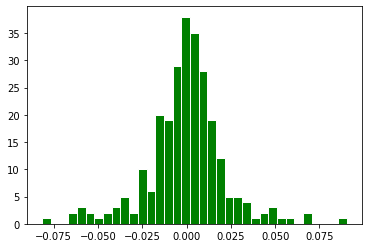

In [18]:
plt.hist(pct_change['AMZN'], bins=35, color='g', edgecolor='w');

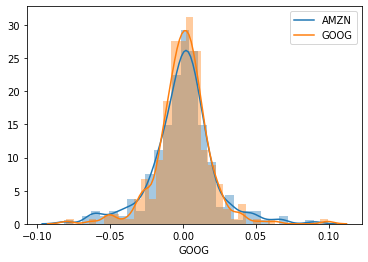

In [21]:
sns.distplot(pct_change['AMZN'], kde_kws={'label': 'AMZN'})
sns.distplot(pct_change['GOOG'], kde_kws={'label': 'GOOG'});


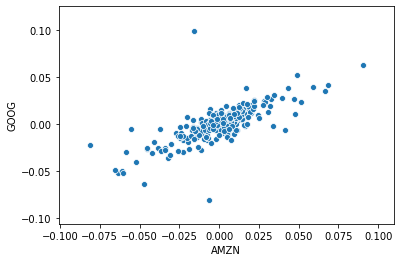

In [23]:
sns.scatterplot(pct_change['AMZN'], pct_change['GOOG']);

In [24]:
pct_change.corr()

Symbols,AMZN,FB,GLD,GOOG,NFLX
Symbols,,,,,
AMZN,1.000000,0.689208,-0.150779,0.744682,0.702295
FB,0.689208,1.000000,-0.091322,0.670613,0.527186
GLD,-0.150779,-0.091322,1.000000,-0.174014,-0.152118
GOOG,0.744682,0.670613,-0.174014,1.000000,0.609972
NFLX,0.702295,0.527186,-0.152118,0.609972,1.000000


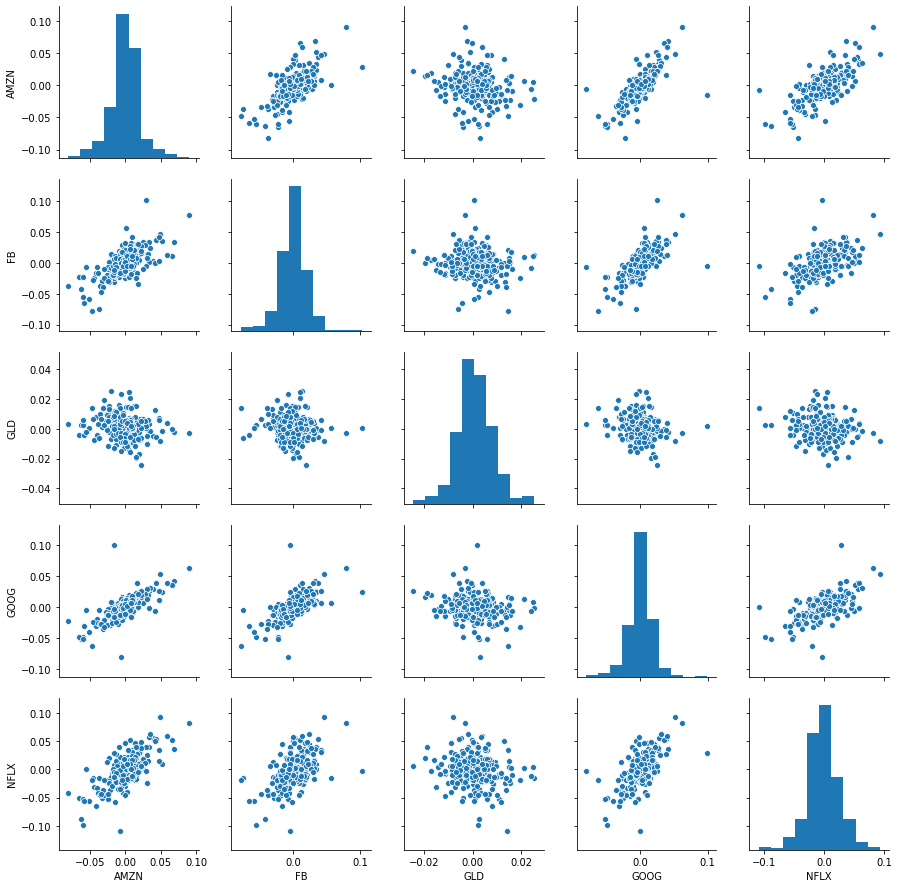

In [25]:
sns.pairplot(pct_change)